In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.linear_model import LinearRegression

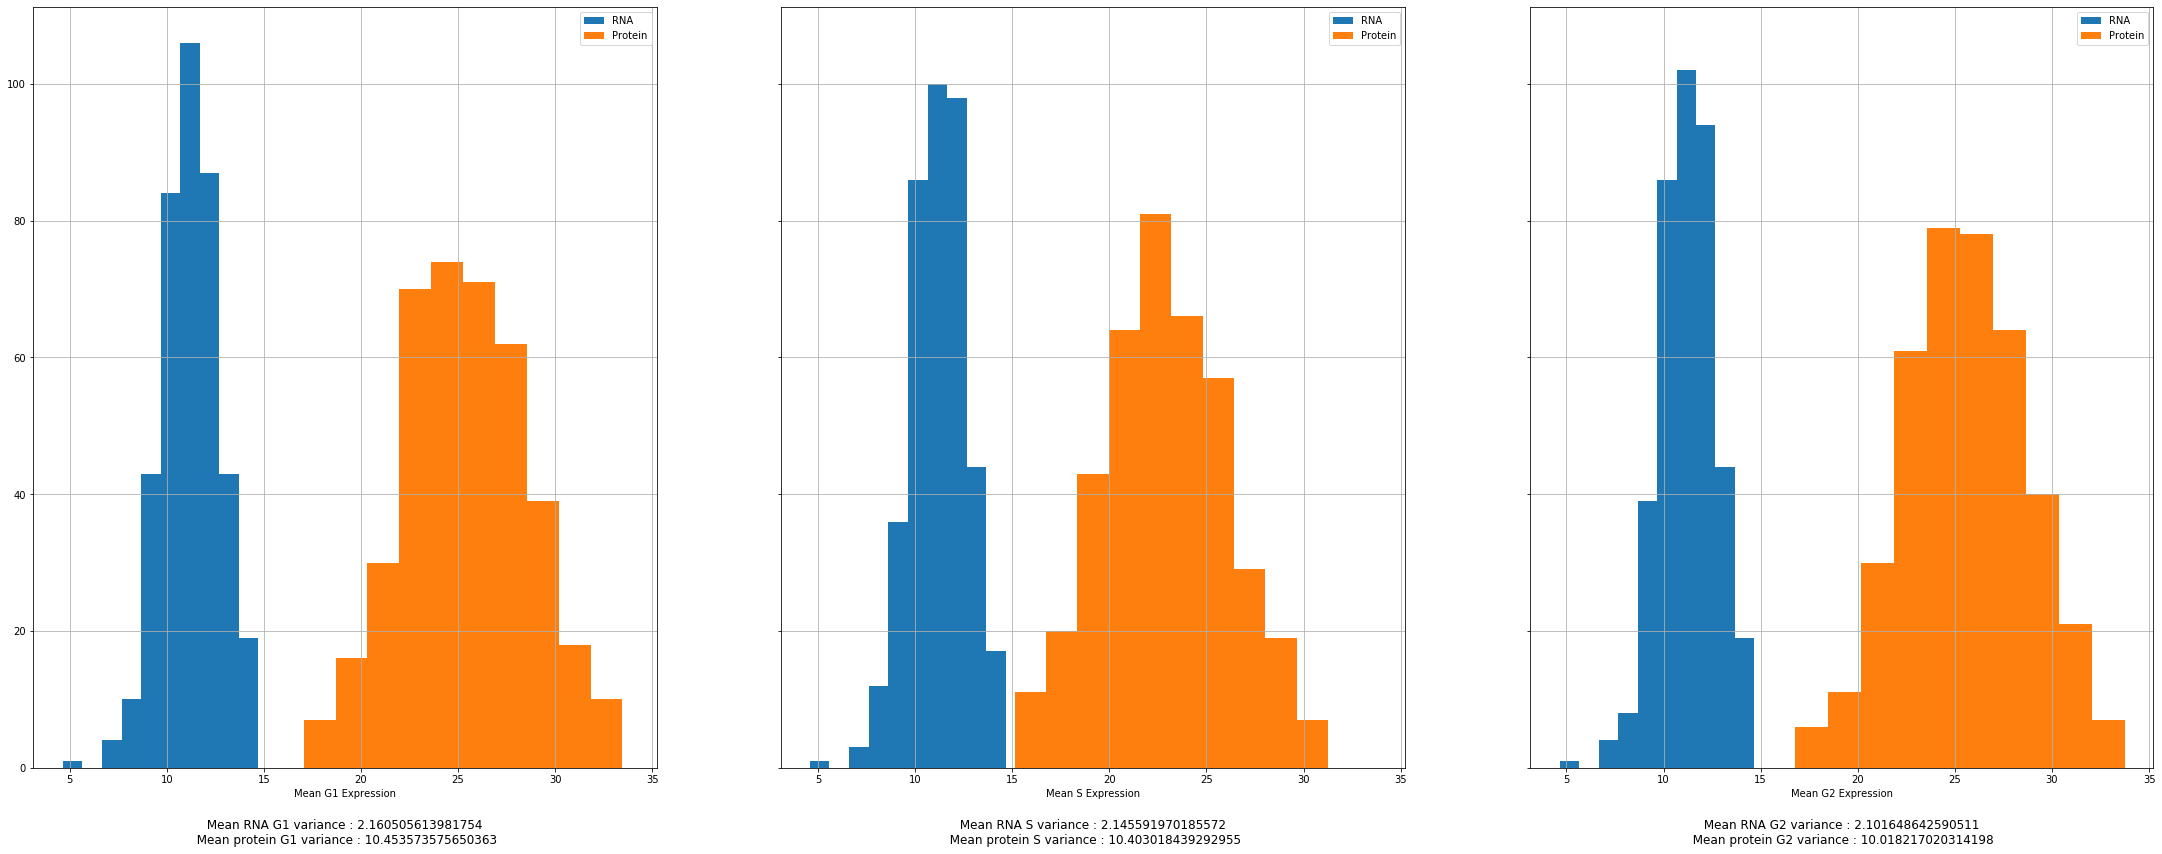

In [2]:
df = pd.read_excel('Cell-Cycle-Set.xlsx')
regr_g1 = LinearRegression()
regr_s = LinearRegression()
regr_g2 = LinearRegression()
# curate to drop columns with missing values
df.dropna(inplace=True)
df.head(5)


# create subplot regions
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(38,14))

# create fig 1
df.mean_RNA_G1.hist(ax=ax1, label='RNA')
df.mean_protein_G1.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G1 Expression')

# create fig 2
df.mean_RNA_S.hist(ax=ax2, label='RNA')
df.mean_protein_S.hist(ax=ax2, label='Protein')
ax2.legend()
ax2.set_xlabel('Mean S Expression')

# create fig 3
df.mean_RNA_G2.hist(ax=ax3, label='RNA')
df.mean_protein_G2.hist(ax=ax3, label='Protein')
ax3.legend()
ax3.set_xlabel('Mean G2 Expression')

# add text describing mean and variance
ax1.text(0.5,-0.1, """ Mean RNA G1 variance : {} \n  Mean protein G1 variance : {} """.format(str(df.mean_RNA_G1.var()), str(df.mean_protein_G1.var())), size=12, ha="center", 
         transform=ax1.transAxes)

ax2.text(0.5,-0.1, """ Mean RNA S variance : {} \n  Mean protein S variance : {} """.format(str(df.mean_RNA_S.var()), str(df.mean_protein_S.var())), size=12, ha="center", 
         transform=ax2.transAxes)

ax3.text(0.5,-0.1, """ Mean RNA G2 variance : {} \n  Mean protein G2 variance : {} """.format(str(df.mean_RNA_G2.var()), str(df.mean_protein_G2.var())), size=12, ha="center", 
         transform=ax3.transAxes)

plt.show()

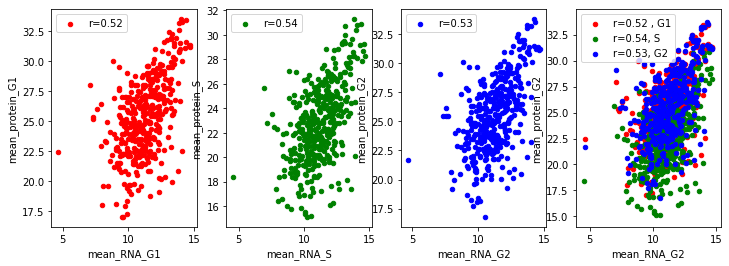

In [3]:
# Task 2
fig2, ax2 = plt.subplots(ncols=4, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[0], color='r', label='r={:0.2f}'.format(
            pearsonr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[1], color='g', label='r={:0.2f}'.format(
            pearsonr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[2], color='b', label='r={:0.2f}'.format(
            pearsonr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
# plt.show()
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[3], color='r', label='r={:0.2f} , G1'.format(
            pearsonr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[3], color='g', label='r={:0.2f}, S'.format(
            pearsonr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[3], color='b', label='r={:0.2f}, G2'.format(
            pearsonr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
plt.show()


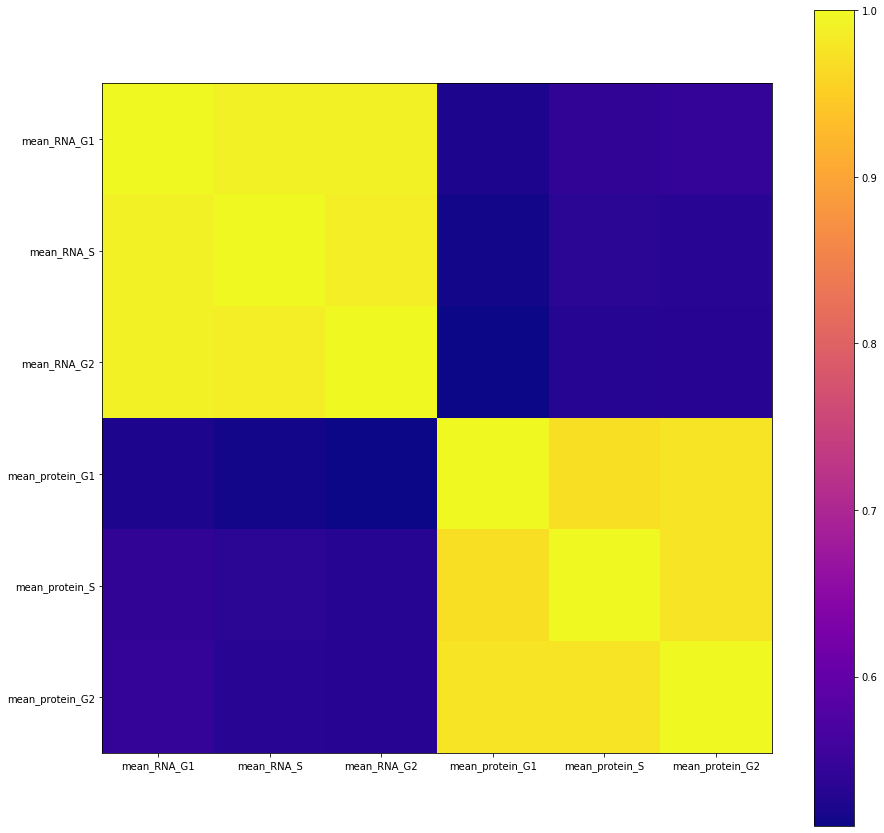

In [4]:
fig3,ax3 = plt.subplots(figsize=(15,15))
cax = ax3.imshow(df.corr(), cmap='plasma')
ax3.set_xticklabels(df.columns)
ax3.set_yticklabels(df.columns)
fig3.colorbar(cax)
plt.show()

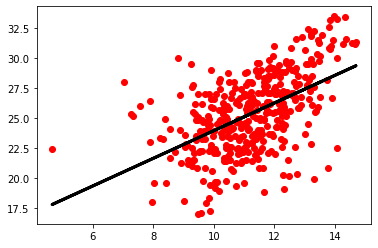

In [5]:
x_train = df.mean_RNA_G1.to_numpy().reshape(-1,1)
y_train = df.mean_protein_G1.to_numpy().reshape(-1,1)
regr_g1.fit(x_train, y_train)
y_pred = regr_g1.predict(x_train)
plt.scatter(x_train, y_train,  color='r')
plt.plot(x_train, y_pred, color='black', linewidth=3)
plt.show()

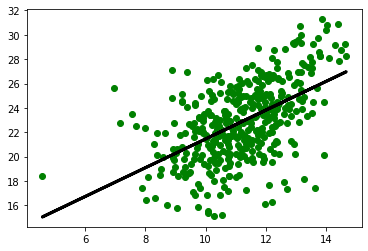

In [6]:
x_train = df.mean_RNA_S.to_numpy().reshape(-1,1)
y_train = df.mean_protein_S.to_numpy().reshape(-1,1)
regr_s.fit(x_train, y_train)
y_pred = regr_s.predict(x_train)
plt.scatter(x_train, y_train,  color='g')
plt.plot(x_train, y_pred, color='black', linewidth=3)
plt.show()

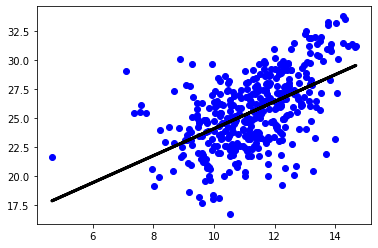

In [7]:
x_train = df.mean_RNA_G2.to_numpy().reshape(-1,1)
y_train = df.mean_protein_G2.to_numpy().reshape(-1,1)
regr_g2.fit(x_train, y_train)
y_pred = regr_g2.predict(x_train)
plt.scatter(x_train, y_train,  color='b')
plt.plot(x_train, y_pred, color='black', linewidth=3)
plt.show()